# Constraining Movement

You can constrain the line to move only horizontally, or only vertically similar to matplotlib's `axhline` and `axhline`.

There are two ways to accomplish this:

## 1. `lock_x` and `lock_y`

The `DraggableLine` has settable `lock_x` and `lock_y` properties which can be changed at any point to prevent or allow movement in `x` or `y` respectively.


In [1]:
# choose backend if in a jupyter notebook
%matplotlib widget

from __future__ import annotations


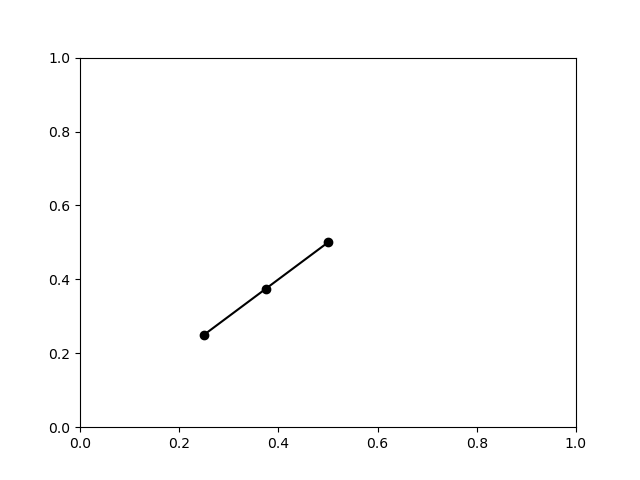

In [2]:
import matplotlib.pyplot as plt
from mpl_draggable_line import DraggableLine


fig, ax = plt.subplots()

init_x = [0.25, 0.5]
init_y = [0.25, 0.5]
dl = DraggableLine(ax, init_x, init_y)

dl.lock_orientation = True

# Freeze in x
# dl.lock_x = True

# Freeze in y
# dl.lock_y = True
plt.show()




## 2. `lock_orientation`

Even with locking one of the dimensions you can still have unexpected behavior if you grab one the handles on the end of the lines. This will result in one handle moving, but constrained to either x or y. If you would instead like to move the entire line as a stiff object then you set `lock_orientation` to `True`

In [12]:
dl.lock_orientation = True

You can always release the locks:

In [13]:
dl.lock_x = False
dl.lock_orientation = False

## 3. Using `DraggableHLine` and `DraggableVLine`

You can also use either the `DraggableHLine` or `DraggableVLine` subclasses to accomplish the same. These subclasses three advantages over using a raw `DraggableLine`.

1. They use a different matplotlib transform so they will go to the edges of the plot - like axvline and axhline.
2. They adjust the callback to only be passed a single number rather than `(x[0], x[1], y[0], y[1])`.
3. You only need to pass a single number on initialization rather than 4 numbers.

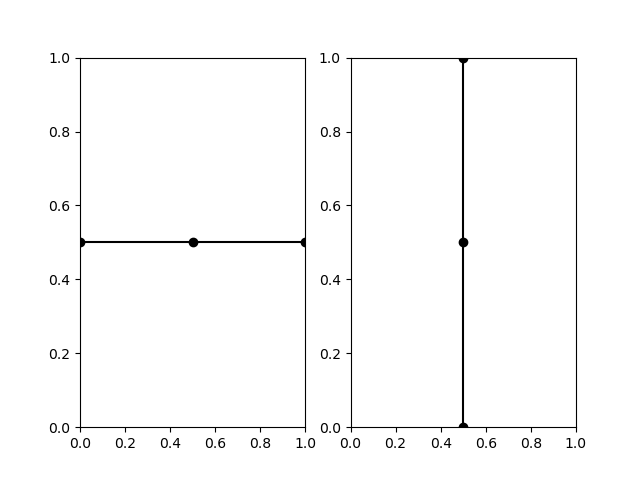

In [7]:

from mpl_draggable_line import DraggableVLine, DraggableHLine

fig, axs = plt.subplots(1, 2)

dl_h = DraggableHLine(axs[0], .5)
dl_v = DraggableVLine(axs[1], .5)

def h_callback(y: float):
    axs[0].set_title(f"y pos: {y:0.2f}")

dl_h.on_line_changed(h_callback)

def v_callback(x: float):
    axs[1].set_title(f"x pos: {x:0.2f}")

dl_v.on_line_changed(v_callback)
plt.show()

